<a href="https://colab.research.google.com/github/Diego-1099/Colabfiles/blob/main/Pr%C3%A1ctica_22__Regresi%C3%B3n_Lineal_M%C3%BAltiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Práctica: Regresión Lineal Múltiple
---


## Datos del Estudiante

*   Apellidos y Nombre: Olmos Aguilera Diego Jaziel
*   Matrícula: 255807

---



##  Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar regresión lineal múltiple utilizando Scikit-Learn para modelar la relación entre varias variables independientes y una variable dependiente**, verificar los supuestos del modelo, interpretar los coeficientes, analizar la correlación entre predictores y evaluar el rendimiento del modelo utilizando métricas como el MSE, RMSE y R².

Datos
Trabajarás con el archivo `advertising.csv`, que contiene información sobre el gasto publicitario en diferentes medios y las ventas obtenidas:

-`TV`: inversión en publicidad televisiva.

-`Radio`: inversión en publicidad en radio.

-`Newspaper`: inversión en publicidad en periódicos.

`Sales`: ventas del producto (variable dependiente).

## Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `advertising.csv`.
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente las variables.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

#===============================================================================
# LIBRERÍAS
#===============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

#===============================================================================
# CARGAR ARCHIVO 'advertising.csv'
#===============================================================================

df = pd.read_csv('/content/drive/MyDrive/ClassFiles/advertising.csv')

#===============================================================================
# PRIMERAS FILAS Y DESCRIPCIÓN ESTADÍSTICA
#===============================================================================

print(df.head())

print('\n')

print(df.describe())


Mounted at /content/drive
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


## Parte 2: Análisis exploratorio de los datos
### 2.1  Análisis de la Relación Lineal entre la variable dependiente y las independientes
1. Grafica dispersión entre cada variable independiente (`TV`, `Radio`, `Newspaper`) y `Sales`. Usa también regplot.
2. Interpreta visualmente la relación entre variables.
  - TV vs Sales:
    
    - Existe una relación positiva entre la inversión en publicidad en televisión y las ventas. Los puntos se aproximan a la línea de la regresión, por lo que hay una relación lineal fuerte. Esto sugiere que a medida que aumente el gasto en la televisión, las  ventas tienden a aumentar.
  
  - Radio vs Sales
  
    - La relación sigue siendo positiva pero menos que la TV. Los puntos se encuentran más dispersos a comparación de la TV. Esto podría indicar que el gasto en radio tiene un impacto menor en las ventas a comparación de la TV.  

  - Newspaper vs Sales

    - La relación en este caso es menos evidente. Los puntos se encuentran más dispersos y se concentran más de lado izquierdo, lo que podemos inferir es que los valores más bajos de inversión en los periódicos tienen más impacto. La pendiente de la línea de regresión se aplana, lo que indica que el gasto en periódicos no tiene un gran efecto sobre las ventas.

Text(0.5, 1.0, 'Newspaper vs Sales')

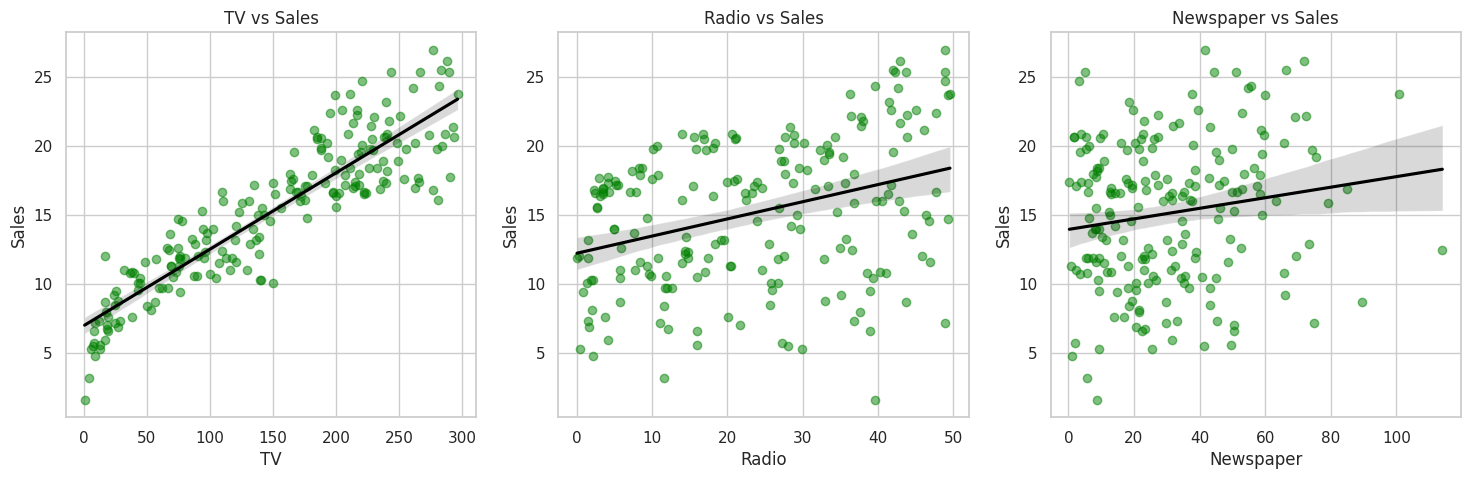

In [2]:
#===============================================================================
# GRÁFICOS DE DISPERSIÓN
#===============================================================================

sns.set(style = 'whitegrid')

fig, axes = plt.subplots(1, 3, figsize = (18, 5))

sns.regplot(x = df['TV'], y = df['Sales'], ax = axes[0], scatter_kws = {'alpha':0.5}, color = 'green', line_kws = {'color':'black'})
axes[0].set_title('TV vs Sales')

sns.regplot(x = df['Radio'], y = df['Sales'], ax = axes[1], scatter_kws = {'alpha':0.5}, color = 'green', line_kws = {'color':'black'})
axes[1].set_title('Radio vs Sales')

sns.regplot(x = df['Newspaper'], y = df['Sales'], ax = axes[2], scatter_kws = {'alpha':0.5}, color = 'green', line_kws = {'color':'black'})
axes[2].set_title('Newspaper vs Sales')


### 2.2: Correlación entre variables
1. Calcula la matriz de correlación.
2. Visualízala con un heatmap.
3. Responde: ¿Qué variables están más correlacionadas con `Sales`? ¿Hay correlación alta entre predictores?

  - TV tiene la correlación más alta con Sales (0.9), lo que indica una relación positiva fuerte
  - Radio también tiene una relación positiva pero menor (0.35)
  - Newspaper tiene la correlación más baja, apenas de 0.16, por lo que su impacto en las ventas es el menor de las tres variables.

  - No hay una correlación alta entre predictores. Radio y Newspaper tienen la correlación mas alta (0.35). TV y Radio tiene una correlación muy baja (0.055) y TV y Newspaper también tiene una correlación muy baja (0.057).

Text(0.5, 1.0, 'Matriz de Correlación')

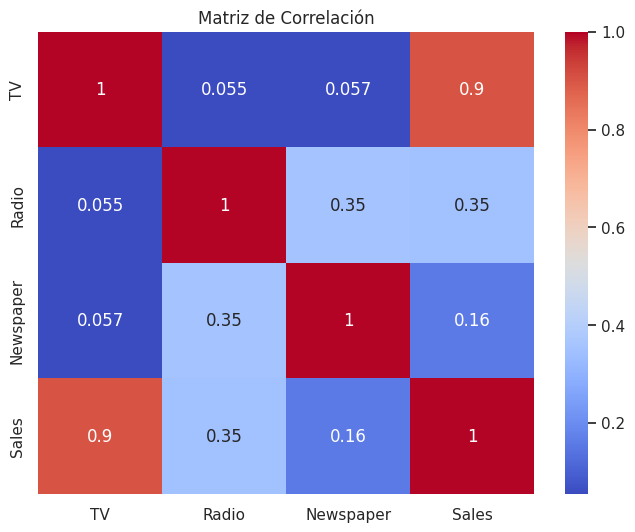

In [3]:
correlacion = df.corr()
plt.figure(figsize = (8, 6))
sns.heatmap(correlacion, annot = True, cmap = 'coolwarm')
plt.title('Matriz de Correlación')


## Parte 3. Multicolinealidad
1. Calcula el VIF (Variance Inflation Factor) para cada predictor.
2. Crea un diagrama de barras  para mostrar el  VIF
3. Interpreta si hay multicolinealidad:
- ¿Alguna variable tiene un VIF mayor a 5 o mayor a 10?

    - No, ninguna de las variables es mayor a 5 o 10, lo que indica una baja multicolinealidad entre las variables.

- ¿Qué implicaciones tiene esto para el modelo?

    - Las variables no estan correlacionadas entre sí, por lo que no será necesario eliminar ninguna variable por problemas de multicolinealidad.

    Variable       VIF
0      const  6.848900
1         TV  1.004611
2      Radio  1.144952
3  Newspaper  1.145187


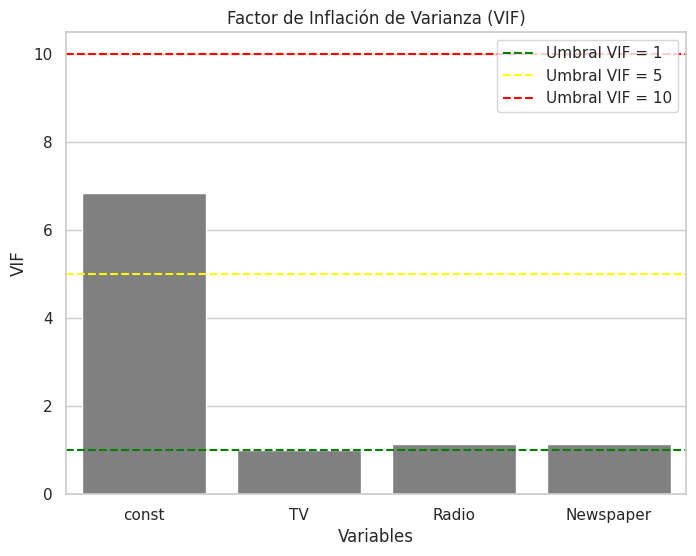

In [4]:
#===============================================================================
# CÁLCULO DEL VIF
#===============================================================================

X = df[['TV', 'Radio', 'Newspaper']]

X = sm.add_constant(X)

vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

#===============================================================================
# VISUALIZACIÓN DEL VIF
#===============================================================================

plt.figure(figsize = (8, 6))
sns.barplot(x = vif['Variable'], y = vif['VIF'], color = 'gray')
plt.title("Factor de Inflación de Varianza (VIF)")
plt.ylabel("VIF")
plt.xlabel("Variables")
plt.axhline(1, color = 'green', linestyle = 'dashed', label = 'Umbral VIF = 1')
plt.axhline(5, color = 'yellow', linestyle = 'dashed', label = 'Umbral VIF = 5')
plt.axhline(10, color = 'red', linestyle = 'dashed', label = 'Umbral VIF = 10')
plt.legend()
plt.show()


## Parte 4: Construcción del Modelo (Todas las variables Independientes), Evaluación

### 4.1 Entrenamiento del Modelo (Todas las Variables Independientes)

1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
2. Imprime el intercepto y los coeficientes del modelo.
3. Interpreta cada uno:
¿Qué significa cada uno de los coeficientes  en términos de ventas?

  - TV (0.0544): Por cada unidad adicional gastada en TV, las ventas aumentan 0.0544 unidades.
  - Radio (0.1070): Por cada unidad adicional gastada en Radio, las ventas aumentan 0.1070 unidades.
  - Newspaper (0.0003): Por cada unidad adicional gastada en Newspaper, las ventas aumentan 0.0003 unidades.

In [5]:
#VARIABLE DEPENDIENTE

y = df['Sales']

modelo = sm.OLS(y, X).fit()

intercepto = modelo.params['const']
coef_TV = modelo.params['TV']
coef_Radio = modelo.params['Radio']
coef_Newspaper = modelo.params['Newspaper']

print(f'Intercepto: {intercepto}')
print(f'Coeficiente TV: {coef_TV}')
print(f'Coeficiente Radio: {coef_Radio}')
print(f'Coeficiente Newspaper: {coef_Newspaper}')


Intercepto: 4.625124078808651
Coeficiente TV: 0.05444578033757094
Coeficiente Radio: 0.10700122823870285
Coeficiente Newspaper: 0.00033565792233065245


### 4.2 Normalidad de los residuos

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente?

  - No, no parece que se distribuyan normalmente. Se puede notar un sesgo hacia la izquiera y los datos son asimetricos.

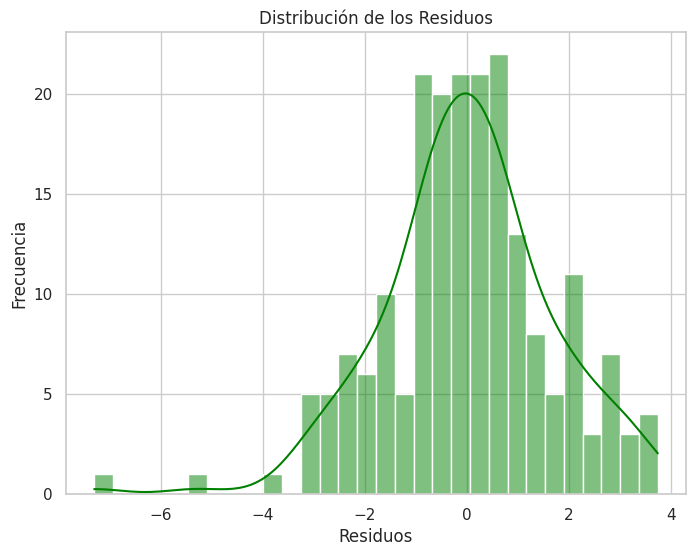

In [6]:
residuos = modelo.resid

plt.figure(figsize = (8, 6))
sns.histplot(residuos, kde = True, bins = 30, color = 'green')
plt.title('Distribución de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

### 4.3. Homocedasticidad

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente?

  - No se observan patrones, parece que los residuos se dispersan aleatoriamente.

Text(0, 0.5, 'Residuos')

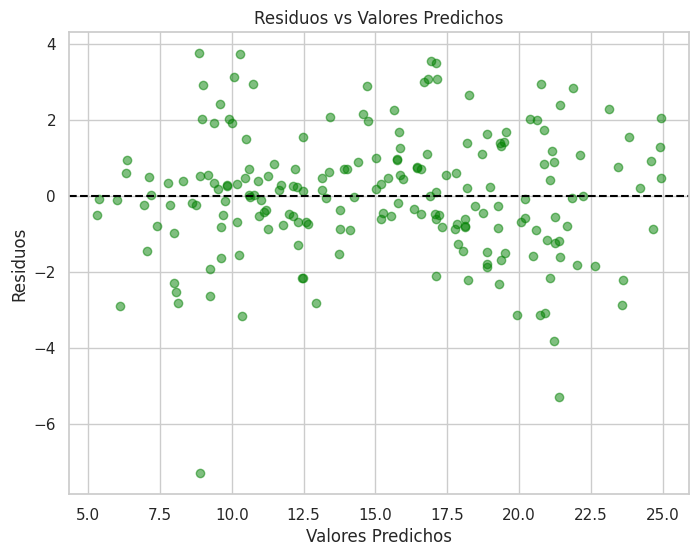

In [7]:
y_pred = modelo.predict(X)

plt.figure(figsize = (8, 6))

plt.scatter(y_pred, residuos, alpha = 0.5, color = 'green')
plt.axhline(0, color = 'black', linestyle = 'dashed')
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')


### 4.4 Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal, b) Desviaciones sistemáticas indican asimetría o colas pesadas.

  - (b) los puntos se desvian significativamente de la línea diagonal, por lo que podemos inferir que los residuos no siguen una distribución normal. Los residuos tienen colas más pesadas.

Text(0.5, 1.0, 'Q-Q Plot de los Residuos')

<Figure size 800x600 with 0 Axes>

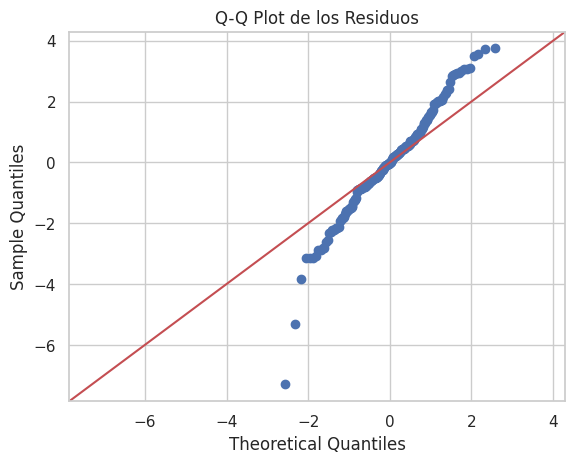

In [14]:
plt.figure(figsize = (8, 6))
sm.qqplot(residuos, line = '45')
plt.title("Q-Q Plot de los Residuos")



### 4.5. Evaluación del Modelo

1. Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación)

2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?

  - MSE (2.7060): Tenemos un valor bajo de Error Cuadrático Medio, por lo que las predicciones estan cerca de los valores reales.
  - RMSE (1.6449): Tenemos un valor bajo de RMSE, por lo que en promedio la diferencia entre las ventas predichas y reales es de aproximadamente 1.6449 unidades, lo cual esta bien ajustado.
  - R2 (0.9025): El modelo explica el 90.25% de la variabilidad de las ventas, lo cual esta bien este indicador.


In [17]:
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
R2 = r2_score(y, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {R2}')


MSE: 2.706006147627315
RMSE: 1.6449942697855562
R2: 0.9025912899684558


### 4.6. Visualización de Predicciones

1. Crea un gráfico comparando Sales reales vs Sales predichas.

2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
3.¿Qué observas?¿Qué observas? ¿Qué información puedes obtener de esta gráfica?

  - Los puntos tienen una tendencia positiva, y aunque algunos de los puntos están cerca de la línea ideal, algunos se desvian, pero no considero que se desvien mucho de la línea.
  - Podemos inferir que el modelo realiza buenas predicciones.

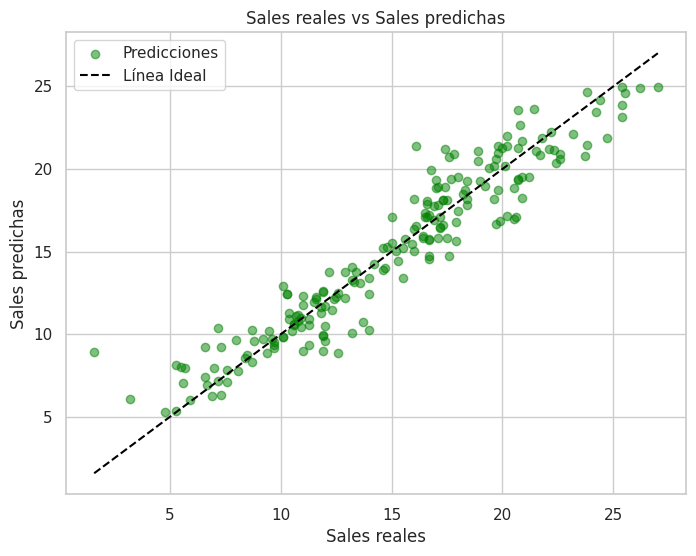

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5, color='green', label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='dashed', label='Línea Ideal')
plt.title('Sales reales vs Sales predichas')
plt.xlabel('Sales reales')
plt.ylabel('Sales predichas')
plt.legend()
plt.grid(True)
plt.show()



### 4.7 Verificar el impacto de los atributos en el modelo

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.
    - TV p_valor = 1.89e-95
    - Radio p_valor = 4.60e-27
    - Newspaper p_valor = 0.9538

 - ¿Qué variables tienen p-value menores a 0.05?
    
    - TV tiene p_valor < 0.05
    - Radio tiene p_valor < 0.05

 - ¿Cuál es la conclusión sobre esas variables?
    
    - Las variables TV y Radio tienen valores p muy pequeños, por lo que podemos inferir que ambas variables son estadísticamente significativas.
    - A diferencia de Newspaper que tiene un valor p muy grande, por lo que se puede inferir que no es estadísticamente significativa.


In [28]:
modelo_stats = sm.OLS(y, X).fit()
print(modelo_stats.summary())

p_valores = modelo_stats.pvalues
print('\nP valores de cada variable:')
print(p_valores)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           8.13e-99
Time:                        00:36:42   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

##Parte 5:  Construcción del Modelo (sin Multicolinealidad), Evaluación

En el caso de que hayas detectado variables con multicolinealidad. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.



---

 **NO SE DETECTARON VARIABLES CON MULTICOLINEALIDAD**

---

## Parte 6: Construcción del Modelo (sin variables que no muestran una relación lineal), Evaluación

En el caso de que hayas detectado variables sin una relación lineal con la variable dependiente. Elimina aquellas que presenten esta característica y realiza lo siguiente.

En el caso de que hayas detectado variables sin una relación lineal. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

## Parte 4: Construcción del Modelo, Evaluación

### 4.1 Entrenamiento del Modelo (Sin Newspaper)

1. Entrena un modelo de regresión lineal múltiple usando TV y Radio como variables independientes.
2. Imprime el intercepto y los coeficientes del modelo.
3. Interpreta cada uno:
¿Qué significa cada uno de los coeficientes  en términos de ventas?

  - TV (0.0544): Por cada unidad adicional gastada en TV, las ventas aumentan 0.0544 unidades.
  - Radio (0.1070): Por cada unidad adicional gastada en Radio, las ventas aumentan 0.1070 unidades.
  

In [29]:
y = df['Sales']
X_nuevo = df[['TV', 'Radio']]

X_nuevo = sm.add_constant(X_nuevo)

modelo_nuevo = sm.OLS(y, X_nuevo).fit()

print(modelo_nuevo.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Fri, 04 Apr 2025   Prob (F-statistic):          2.39e-100
Time:                        01:43:50   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.290     15.952      0.0

### 4.2 Normalidad de los residuos

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente?

  - No, no parece que se distribuyan normalmente. Se puede notar un sesgo hacia la izquiera y los datos son asimetricos. Hay valores atipicos que hacen el sesgo hacia la izquierda.

Text(0, 0.5, 'Frecuencia')

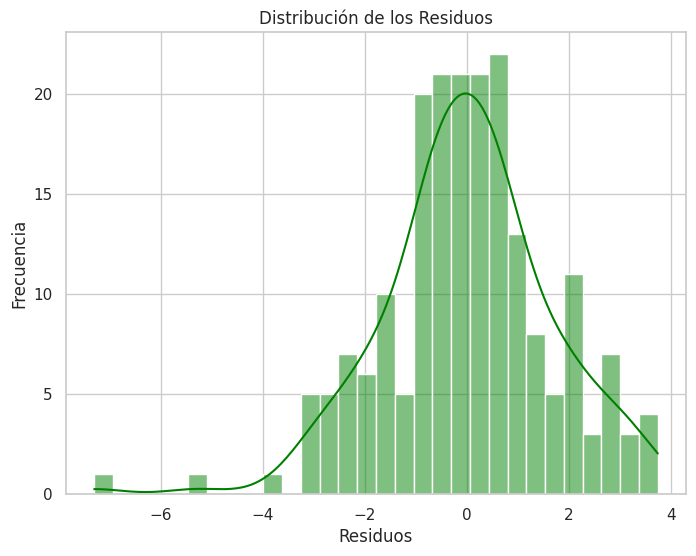

In [30]:
y_pred_nuevo = modelo_nuevo.predict(X_nuevo)
residuos_nuevo = y - y_pred_nuevo

plt.figure(figsize = (8, 6))
sns.histplot(residuos_nuevo, kde = True, bins = 30, color = 'green')
plt.title('Distribución de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')


### 4.3. Homocedasticidad

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente?

  - No se observan patrones, parece que los residuos se dispersan aleatoriamente. De la misma forma que con el modelo con todas las variables.

Text(0, 0.5, 'Residuos')

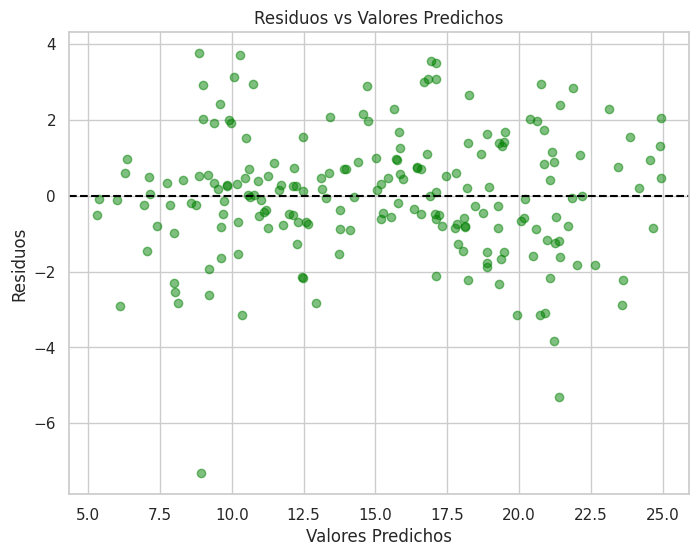

In [31]:
plt.figure(figsize = (8, 6))
plt.scatter(y_pred_nuevo, residuos_nuevo, alpha = 0.5, color = 'green')
plt.axhline(0, color = 'black', linestyle = 'dashed')
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')


### 4.4 Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal, b) Desviaciones sistemáticas indican asimetría o colas pesadas.

  - (b) los puntos se desvian significativamente de la línea diagonal, por lo que podemos inferir que los residuos no siguen una distribución normal. Los residuos tienen colas más pesadas.

Text(0.5, 1.0, 'Q-Q Plot de los Residuos')

<Figure size 800x600 with 0 Axes>

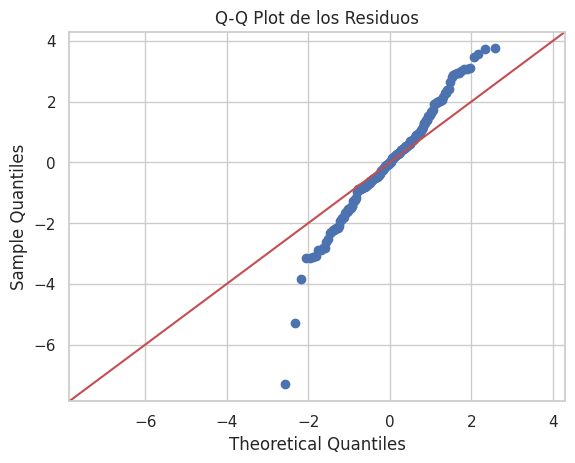

In [32]:
plt.figure(figsize = (8, 6))
sm.qqplot(residuos_nuevo, line = '45')
plt.title("Q-Q Plot de los Residuos")


### 4.5. Evaluación del Modelo

1. Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación)

2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?

  - MSE (2.7060): Tenemos un valor bajo de Error Cuadrático Medio, por lo que las predicciones estan cerca de los valores reales.
  - RMSE (1.6449): Tenemos un valor bajo de RMSE, por lo que en promedio la diferencia entre las ventas predichas y reales es de aproximadamente 1.6449 unidades, lo cual esta bien ajustado.
  - R2 (0.9025): El modelo explica el 90.25% de la variabilidad de las ventas, lo cual esta bien este indicador.


In [33]:
mse_nuevo = mean_squared_error(y, y_pred_nuevo)
rmse_nuevo = np.sqrt(mse_nuevo)
R2_nuevo = r2_score(y, y_pred_nuevo)

print(f'MSE_nuevo: {mse_nuevo}')
print(f'RMSE_nuevo: {rmse_nuevo}')
print(f'R2_nuevo: {R2_nuevo}')

MSE_nuevo: 2.7060525778834883
RMSE_nuevo: 1.6450083823140502
R2_nuevo: 0.9025896186081139


### 4.6. Visualización de Predicciones

1. Crea un gráfico comparando Sales reales vs Sales predichas.

2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
3.¿Qué observas?¿Qué observas? ¿Qué información puedes obtener de esta gráfica?

  - Los puntos tienen una tendencia positiva, y aunque algunos de los puntos están cerca de la línea ideal, algunos se desvian, pero no considero que se desvien mucho de la línea.
  - Podemos inferir que el modelo realiza buenas predicciones.

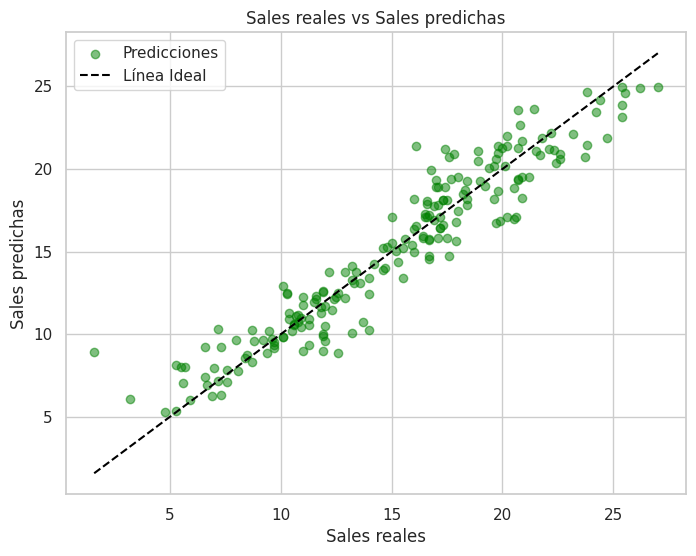

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_nuevo, alpha=0.5, color='green', label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='dashed', label='Línea Ideal')
plt.title('Sales reales vs Sales predichas')
plt.xlabel('Sales reales')
plt.ylabel('Sales predichas')
plt.legend()
plt.grid(True)
plt.show()



### 4.7 Verificar el impacto de los atributos en el modelo

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.
    - TV p_valor = 5.42e-96
    - Radio p_valor = 6.66e-30

 - ¿Qué variables tienen p-value menores a 0.05?
    
    - TV tiene p_valor < 0.05
    - Radio tiene p_valor < 0.05

 - ¿Cuál es la conclusión sobre esas variables?
    
    - Las variables TV y Radio tienen valores p muy pequeños, por lo que podemos inferir que ambas variables son estadísticamente significativas.
    - Los valores p mejoraron al quitar la variable Newspaper, por lo que se puede inferir que el modelo tiene una mejora. Ahora las variables TV y Radio tienen una mayor significancia.

In [37]:
modelo_stats_nuevo = sm.OLS(y, X_nuevo).fit()
print(modelo_stats_nuevo.summary())

p_valores_nuevo = modelo_stats_nuevo.pvalues
print('\nP valores de cada variable:')
print(p_valores_nuevo)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Fri, 04 Apr 2025   Prob (F-statistic):          2.39e-100
Time:                        02:03:46   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.290     15.952      0.0

##7. Conclusiones.

¿Cuál de los tres modelos construidos fue el mejor?
¿Cuál fue el atributo que mas influencia tiene en las ventas?

  - Solo se construyeron dos modelos, debido a que no hubo multicolinealidad entre las variables. El 1er modelo utilizaba todas las variables (TV, Radio y Newspaper) y el 2do modelo se elimino la variable Newspaper, ya que no mostraba una relacion lineal con la variable dependiente Sales.
  - Comparando ambos modelos, el 2do modelo resulto ser un poco mejor, ya que al eliminar la variable Newspaper mejoro la significancia de TV y Radio, por lo que se puede inferir que ambas variables tuvieron un mayor impacto en las ventas.